<a href="https://colab.research.google.com/github/aishwaryaaramanathan/FOML_lab_241501011/blob/main/exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load data
iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,
/tmp/ipython-input-1220274471.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter

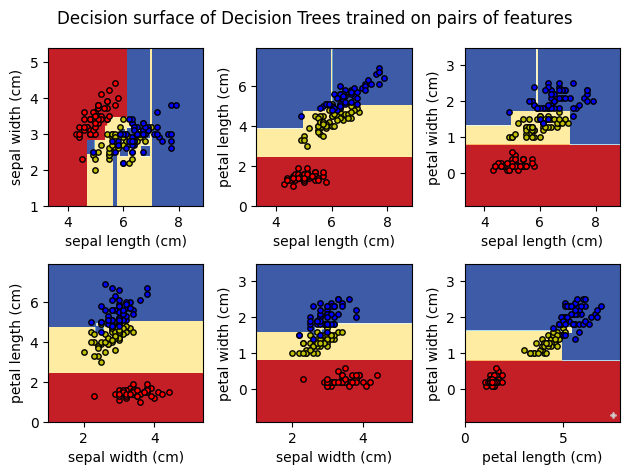

In [6]:
# Loop through all pairs of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Select only the two features
    X = iris.data[:, pair]
    y = iris.target

    # Train decision tree
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Draw decision surface
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Label axes
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=iris.target_names[i] if pairidx == 0 else "",
                    cmap=plt.cm.RdYlBu, edgecolor="black", s=15)

    plt.axis("tight")
plt.suptitle("Decision surface of Decision Trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.tight_layout()
plt.show()

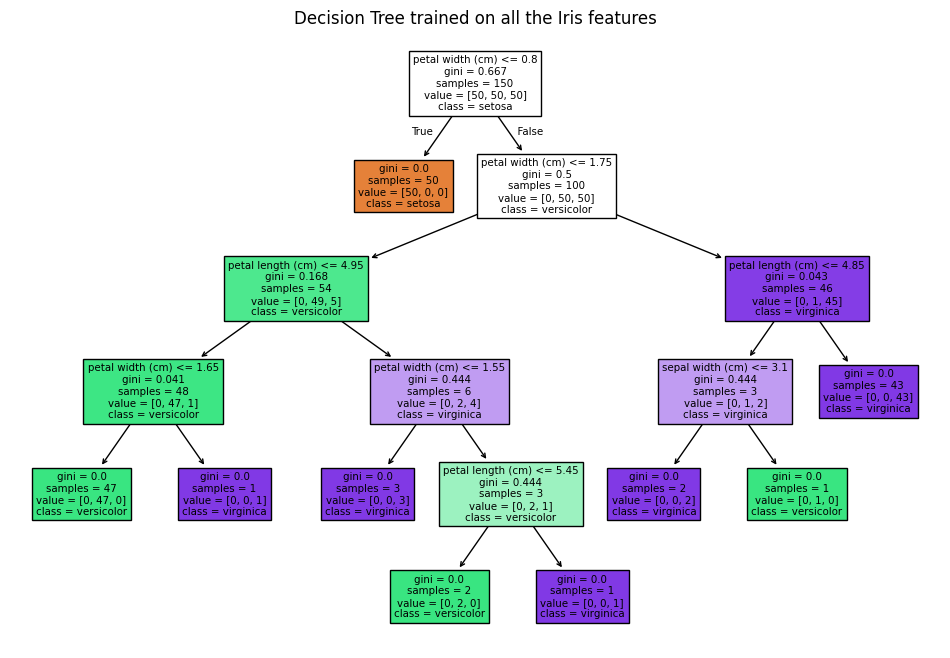

In [7]:
# Plot full Decision Tree trained on all features
plt.figure(figsize=(12, 8))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree trained on all the Iris features")
plt.show()
